In [5]:
% matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [6]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 

In [13]:
population = pd.read_excel('data/Report_2018_1Q.xls', 
                     header=2, # 2번째 header 부터 읽어옴
                     parse_cols="B, C, D, M, N" # 엑셀에서 해당 이름 컬럼만
                    )
population.head()

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  This is separate from the ipykernel package so we can avoid doing imports until


,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4237610,10112070,2.32,1382420
1,종로구,73879,164348,2.09,26429
2,중구,60903,135139,2.07,21655
3,용산구,108497,245411,2.12,37238
4,성동구,134543,314551,2.28,41752


In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
자치구         26 non-null object
세대          26 non-null int64
계           26 non-null int64
세대당인구       26 non-null float64
65세이상고령자    26 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [14]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [17]:
population = population.drop([0])
population

KeyError: '[0] not found in axis'

In [19]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73879,164348,2.09,26429
2,중구,60903,135139,2.07,21655
3,용산구,108497,245411,2.12,37238
4,성동구,134543,314551,2.28,41752
5,광진구,161407,371671,2.21,44470


C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


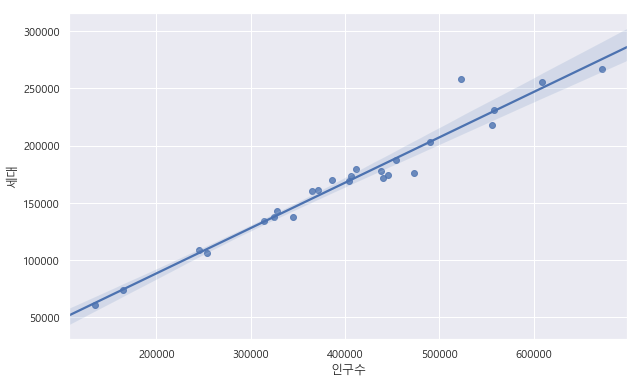

In [21]:
sns.regplot(x="인구수", y="세대", data=population); # 세대와 인구수 간의 상관관계 파악

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


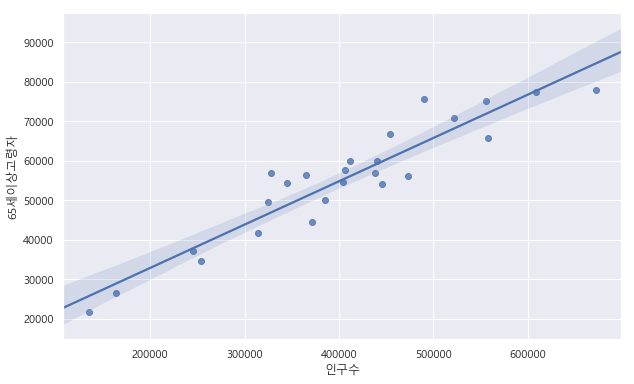

In [22]:
sns.regplot(x="인구수", y="65세이상고령자", data=population);
# 인구수에 따라 65세 이상 고령자가 많은 것은 아님

In [23]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [24]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [25]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

,gu,counts
1,종로구,164348
2,중구,135139
3,용산구,245411
4,성동구,314551
5,광진구,371671


In [26]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)
map

In [27]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [28]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [29]:
map

In [30]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['65세이상고령자']})
# dataframe을 dict형태로 만들기
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [31]:
map

In [32]:
guDat

,gu,counts
1,종로구,26429
2,중구,21655
3,용산구,37238
4,성동구,41752
5,광진구,44470
6,동대문구,56284
7,중랑구,59992
8,성북구,66896
9,강북구,57002
10,도봉구,54293


In [33]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,종로구,73879,164348,2.09,26429,16.081121
2,중구,60903,135139,2.07,21655,16.024242
3,용산구,108497,245411,2.12,37238,15.173729
4,성동구,134543,314551,2.28,41752,13.273523
5,광진구,161407,371671,2.21,44470,11.964883


In [45]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Mapbox Bright')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map.save('./data/map.html')

In [39]:
map

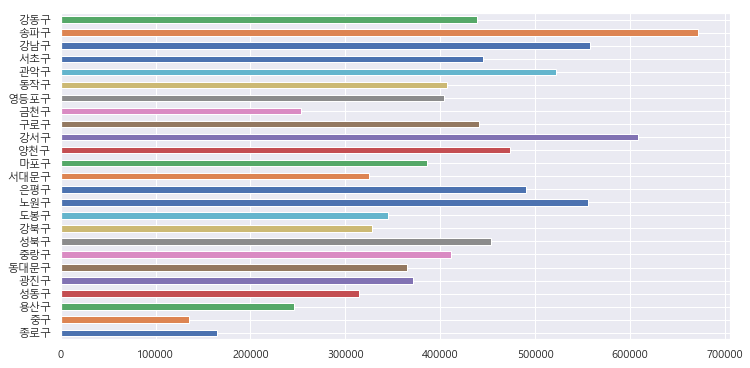

In [41]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='barh')


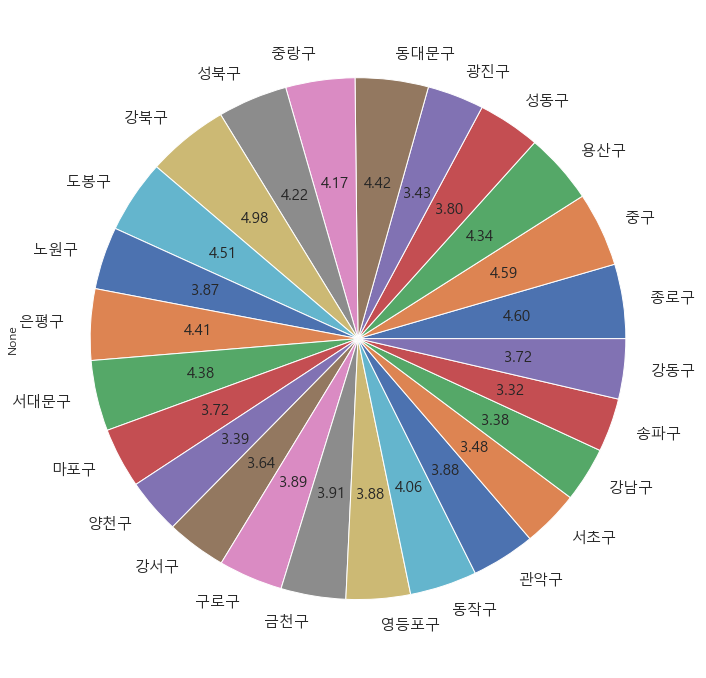

In [42]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15)

In [44]:
population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')

In [46]:
?folium.Map